#                                    Churn Prediction

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#load dataset
df = pd.read_csv('C:\\Users\\sraks\\AIML Internship\\AIML-Internship\\TASK\\T01\\task01.csv')
df.head()

,Customer ID,Country,State,Postal Code,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Australia,New South Wales,2000,Female,0,Yes,No,1.0,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Australia,New South Wales,2035,Female,0,Yes,No,1.0,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Australia,New South Wales,2014,Male,0,No,No,34.0,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Australia,New South Wales,2041,Male,0,No,No,2.0,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Australia,New South Wales,2050,Male,0,No,No,45.0,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No


In [4]:
#check for null values
df.isnull().sum()

Customer ID          0
Country              0
State                0
Postal Code          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               1
Phone Service        0
Multiple Lines       0
Internet Service     1
Online Security      1
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      2
Total Charges        8
Churn                0
dtype: int64

In [5]:
#Since the data is huge and null values are very small it can be safely dropped
dfv1 = df.dropna()
dfv1.isna().sum()

Customer ID          0
Country              0
State                0
Postal Code          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [6]:
dfv1['Country'].unique()

array(['Australia'], dtype=object)

In [7]:
dfv1['State'].unique()

array(['New South Wales'], dtype=object)

In [8]:
#Drop the factors that doesnt effect our prediction.
dfv2 = dfv1.drop(['Customer ID','Country','State','Postal Code'], axis = 'columns')
dfv2.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No


In [9]:
dfv2['Gender'].unique()

array(['Female', 'Male', 'female'], dtype=object)

In [10]:
dfv2['Gender']=dfv2['Gender'].apply(lambda x : x.lower())
dfv2['Gender'].unique()

array(['female', 'male'], dtype=object)

In [11]:
dfv2['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
dfv2['Phone Service'].unique() 

array(['No', 'Yes', ' '], dtype=object)

In [13]:
dfv2.groupby('Phone Service')['Phone Service'].agg('count')

Phone Service
          1
No      461
Yes    4524
Name: Phone Service, dtype: int64

In [14]:
dfv2['Phone Service']=dfv2['Phone Service'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Phone Service')['Phone Service'].agg('count')

Phone Service
no      462
yes    4524
Name: Phone Service, dtype: int64

In [15]:
dfv2['Multiple Lines'].unique()

array(['No phone service', 'No', 'Yes', ' ', 'N0'], dtype=object)

In [16]:
dfv2.groupby('Multiple Lines')['Multiple Lines'].agg('count')

Multiple Lines
                       2
N0                     1
No                  2393
No phone service     461
Yes                 2129
Name: Multiple Lines, dtype: int64

In [17]:
dfv2["Multiple Lines"] = np.select([dfv2["Multiple Lines"]=='Yes', dfv2["Multiple Lines"]=='No phone service'],
  ["yes", "No phone service"],
  default="no")
dfv2.groupby('Multiple Lines')['Multiple Lines'].agg('count')

Multiple Lines
No phone service     461
no                  2396
yes                 2129
Name: Multiple Lines, dtype: int64

In [18]:
dfv2['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [19]:
dfv2.groupby('Internet Service')['Internet Service'].agg('count')

Internet Service
DSL            1708
Fiber optic    2187
No             1091
Name: Internet Service, dtype: int64

In [20]:
dfv2['Online Security'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
dfv2.groupby('Online Security')['Online Security'].agg('count')

Online Security
No                     2466
No internet service    1091
Yes                    1429
Name: Online Security, dtype: int64

In [22]:
dfv2['Online Security']=dfv2['Online Security'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Online Security')['Online Security'].agg('count')

Online Security
no     3557
yes    1429
Name: Online Security, dtype: int64

In [23]:
dfv2['Online Backup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [24]:
dfv2.groupby('Online Backup')['Online Backup'].agg('count')

Online Backup
No                     2174
No internet service    1091
Yes                    1721
Name: Online Backup, dtype: int64

In [25]:
dfv2['Online Backup']=dfv2['Online Backup'].apply(lambda x : x.split(' ')[0])
dfv2.groupby('Online Backup')['Online Backup'].agg('count')

Online Backup
No     3265
Yes    1721
Name: Online Backup, dtype: int64

In [26]:
dfv2['Device Protection'].unique()

array(['No', 'Yes', 'No internet service', 'N0'], dtype=object)

In [27]:
dfv2.groupby('Device Protection')['Device Protection'].agg('count')

Device Protection
N0                        1
No                     2170
No internet service    1091
Yes                    1724
Name: Device Protection, dtype: int64

In [28]:
dfv2['Device Protection']=dfv2['Device Protection'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Device Protection')['Device Protection'].agg('count')

Device Protection
no     3262
yes    1724
Name: Device Protection, dtype: int64

In [29]:
dfv2['Tech Support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
dfv2.groupby('Tech Support')['Tech Support'].agg('count')

Tech Support
No                     2474
No internet service    1091
Yes                    1421
Name: Tech Support, dtype: int64

In [31]:
dfv2['Tech Support']=dfv2['Tech Support'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Tech Support')['Tech Support'].agg('count')

Tech Support
no     3565
yes    1421
Name: Tech Support, dtype: int64

In [32]:
dfv2['Streaming TV'].unique()
dfv2.groupby('Streaming TV')['Streaming TV'].agg('count')

Streaming TV
N0                        1
No                     1980
No internet service    1090
No internetservice        1
Yes                    1914
Name: Streaming TV, dtype: int64

In [33]:
dfv2['Streaming TV']=dfv2['Streaming TV'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Streaming TV')['Streaming TV'].agg('count')

Streaming TV
no     3072
yes    1914
Name: Streaming TV, dtype: int64

In [34]:
dfv2['Streaming Movies'].unique()
dfv2.groupby('Streaming Movies')['Streaming Movies'].agg('count')

Streaming Movies
                          1
No                     1950
No internet service    1090
Yes                    1945
Name: Streaming Movies, dtype: int64

In [35]:
dfv2['Streaming Movies']=dfv2['Streaming Movies'].apply(lambda x : 'yes' if x == 'Yes' else 'no')
dfv2.groupby('Streaming Movies')['Streaming Movies'].agg('count')

Streaming Movies
no     3041
yes    1945
Name: Streaming Movies, dtype: int64

In [36]:
dfv2['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [37]:
dfv2['Paperless Billing'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
dfv2['Payment Method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [39]:
dfv2.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,female,0,Yes,No,1.0,no,No phone service,DSL,no,Yes,no,no,no,no,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,female,0,Yes,No,1.0,no,No phone service,DSL,no,Yes,no,no,no,no,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,male,0,No,No,34.0,yes,no,DSL,yes,No,yes,no,no,no,One year,No,Mailed check,56.95,1889.50,No
3,male,0,No,No,2.0,yes,no,DSL,yes,Yes,no,no,no,no,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,male,0,No,No,45.0,no,No phone service,DSL,yes,No,yes,yes,no,no,One year,No,Bank transfer (automatic),42.3,1840.75,No


In [40]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
dfv2[~dfv2['Monthly Charges'].apply(is_float)]


,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
4774,male,0,No,No,44.0,no,No phone service,DSL,no,Yes,yes,no,yes,yes,One year,Yes,Mailed check,"53,95",2375.4,Yes


In [41]:
dfv2['Monthly Charges'].loc[4774]=53.95
dfv2['Monthly Charges'].loc[4774]
dfv2['Monthly Charges'].dtype


C:\Users\sraks\AppData\Local\Temp\ipykernel_5568\4058329080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv2['Monthly Charges'].loc[4774]=53.95


dtype('O')

In [42]:
dfv2['Monthly Charges']=dfv2['Monthly Charges'].astype(float)
dfv2['Monthly Charges'].dtype

dtype('float64')

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
column_names = list(dfv2.columns)
column_names

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'tenure',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn']

In [44]:
index = [-3,-2,4,1]
for i in index:
    column_names.pop(i)
column_names

['Gender',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn']

In [45]:
dfv2[column_names]=dfv2[column_names].apply(LabelEncoder().fit_transform)
dfv2

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,1,0,1.0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,1,0,1.0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
2,1,0,0,0,34.0,1,1,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
3,1,0,0,0,2.0,1,1,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
4,1,0,0,0,45.0,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,0,1,0,51.0,0,0,0,0,1,0,0,0,0,0,1,1,30.05,1529.45,0
4994,1,0,1,1,72.0,0,0,0,1,1,1,1,1,1,2,1,0,65.65,4664.50,0
4995,0,0,0,0,18.0,1,1,1,1,0,0,0,1,1,0,1,2,96.05,1740.70,1
4996,0,0,0,0,7.0,1,2,1,0,0,0,0,0,0,0,1,0,75.10,552.95,1


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
cn = list(dfv2.columns)
remove = [-3,-2,-1]
for i in remove:
    cn.pop(i)  
cn

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'tenure',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

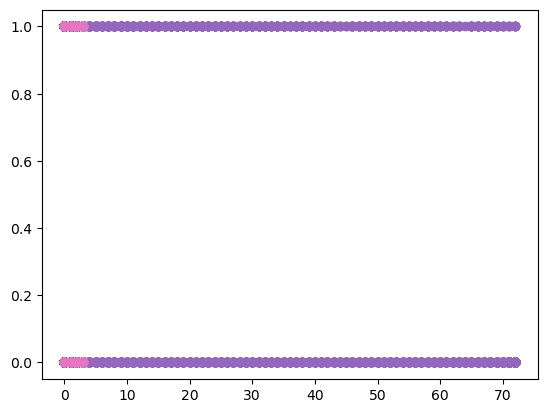

In [47]:
for i in cn:
    plt.scatter(dfv2[i], dfv2.Churn)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfv2.drop(['Total Charges'], axis = "columns"), dfv2['Total Charges'], test_size=0.2)
len(x_train), len(x_test)

(3988, 998)

In [49]:
dfv2.dtypes

Gender                 int32
Senior Citizen         int64
Partner                int32
Dependents             int32
tenure               float64
Phone Service          int32
Multiple Lines         int32
Internet Service       int32
Online Security        int32
Online Backup          int32
Device Protection      int32
Tech Support           int32
Streaming TV           int32
Streaming Movies       int32
Contract               int32
Paperless Billing      int32
Payment Method         int32
Monthly Charges      float64
Total Charges        float64
Churn                  int32
dtype: object

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8991492980630726